<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5	"> CAPSTONE NLP2
    

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5	"> PROBLEM STATEMENT

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">• DOMAIN: Industrial safety. NLP based Chatbot.
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">• CONTEXT:
    
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">• DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.

<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">Columns description:
    
‣ Data: timestamp or time/date information
    
‣ Countries: which country the accident occurred (anonymised)
    
‣ Local: the city where the manufacturing plant is located (anonymised)
    
‣ Industry sector: which sector the plant belongs to
    
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
    
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
    
‣ Gender: if the person is male of female
    
‣ Employee or Third Party: if the injured person is an employee or a third party
    
‣ Critical Risk: some description of the risk involved in the accident
    
‣ Description: Detailed description of how the accident happened.
    
Link to download the dataset: https://drive.google.com/file/d/1_GmrRP1S2OIa02KlfOBNkYa8uxazGbfE/view?usp=sharing,
        
Original dataset link: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database
        
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">• PROJECT OBJECTIVE:
    
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description.


<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">• PROJECT TASK: [ Duration: 6 weeks, Score: 100 points]
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">1. Milestone 1: [ Duration: 2 weeks, Score: 20 points]
    
‣ Input: Interim report
    
‣ Process:
    
‣ Step 1: Import the data
    
‣ Step 2: Data cleansing
    
‣ Step 3: Data preprocessing
    
‣ Step 4: Data preparation to be used for AIML model learning
    
‣ Output: Clean data as .xlsx or .csv file to be used for AIML model learning
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">2. Milestone 2: [ Duration: 2 weeks, Score: 20 points]
    
‣ Input: Output of milestone 1
    
‣ Process:
    
‣ Step 1: NLP pre processing
    
‣ Step 2: Design, train and test machine learning classifiers
    
‣ Step 3: Design, train and test Neural networks classifiers
    
‣ Step 4: Design, train and test RNN or LSTM classifiers
    
‣ Step 5: Choose the best performing model classifier and pickle it.
    
‣ Output: Pickled model to be used for future prediction
    
‣ Submission: Interim report
    
    
<span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5	">3. Milestone 3: [ Duration: 2 weeks, Score: 60 points]
    
    
‣ Input: Pickled model from milestone 2
‣ Process: [ 15 points ]
‣ Step 1: Design a clickable UI which can automate tasks performed under milestone 1 [ 5 points ]
‣ Step 2: Design a clickable UI which can automate tasks performed under milestone 2 [ 5 points ]
‣ Step 3: Design a clickable UI based chatbot interface [ 5 points ]
‣ Output: Clickable UI based chatbot interface which accepts text as input and replies back with relevant answers.
‣ Submission: Final report [ 45 points ]
    
    
‣ Hints:
    
‣ Please refer to the blog to understand the basic designing and functioning of chatbots: https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/
‣ To make GUI as a desk app you can use TKINTER library.
‣ To make web service GUI you can use FLASK or DJANGO library.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# for pre processing the description
import re
import nltk
import random
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\Dinesh
[nltk_data]     Kanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Dinesh
[nltk_data]     Kanna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data = pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv', index_col=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 438
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 36.5+ KB


In [6]:
data.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [7]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
data.head()

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [10]:
columns = data[data.columns[~data.columns.isin(['Description', 'Unnamed: 0', 'Data'])]].columns.tolist()
for cols in columns:
    print(f'Unique values for {cols} is \n{data[cols].unique()}\n')

Unique values for Date is 
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 

In [11]:
replace_struc = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
data['Local'] = data['Local'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}
data['Accident Level'] = data['Accident Level'].map(replace_struc)
replace_struc = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5}
data['Potential Accident Level'] = data['Potential Accident Level'].map(replace_struc)
del replace_struc

In [12]:
data.head()

Date     Country  Local Industry Sector  Accident Level  \
0  2016-01-01 00:00:00  Country_01      1          Mining               0   
1  2016-01-02 00:00:00  Country_02      2          Mining               0   
2  2016-01-06 00:00:00  Country_01      3          Mining               0   
3  2016-01-08 00:00:00  Country_01      4          Mining               0   
4  2016-01-10 00:00:00  Country_01      4          Mining               3   

   Potential Accident Level Gender         Employee type        Critical Risk  \
0                         3   Male           Third Party              Pressed   
1                         3   Male              Employee  Pressurized Systems   
2                         2   Male  Third Party (Remote)         Manual Tools   
3                         0   Male           Third Party               Others   
4                         3   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

In [13]:
data.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

In [14]:
data.isnull().any()

Date                        False
Country                     False
Local                       False
Industry Sector             False
Accident Level              False
Potential Accident Level    False
Gender                      False
Employee type               False
Critical Risk               False
Description                 False
dtype: bool

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x : x.year)
data['Month'] = data['Date'].apply(lambda x : x.month)

data['Weekday'] = data['Date'].apply(lambda x : x.day_name())
data.head()

Date     Country  Local Industry Sector  Accident Level  \
0 2016-01-01  Country_01      1          Mining               0   
1 2016-01-02  Country_02      2          Mining               0   
2 2016-01-06  Country_01      3          Mining               0   
3 2016-01-08  Country_01      4          Mining               0   
4 2016-01-10  Country_01      4          Mining               3   

   Potential Accident Level Gender         Employee type        Critical Risk  \
0                         3   Male           Third Party              Pressed   
1                         3   Male              Employee  Pressurized Systems   
2                         2   Male  Third Party (Remote)         Manual Tools   
3                         0   Male           Third Party               Others   
4                         3   Male           Third Party               Others   

                                         Description  Year  Month    Weekday  
0  While removing the drill rod of the Jumbo 08 f...  2016      1     Friday  
1  During the activation of a sodium sulphide pum...  2016      1   Saturday  
2  In the sub-station MILPO located at level +170...  2016      1  Wednesday  
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1     Friday  
4  Approximately at 11:45 a.m. in circumstances t...  2016      1     Sunday

### EDA

Univariate Analysis

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


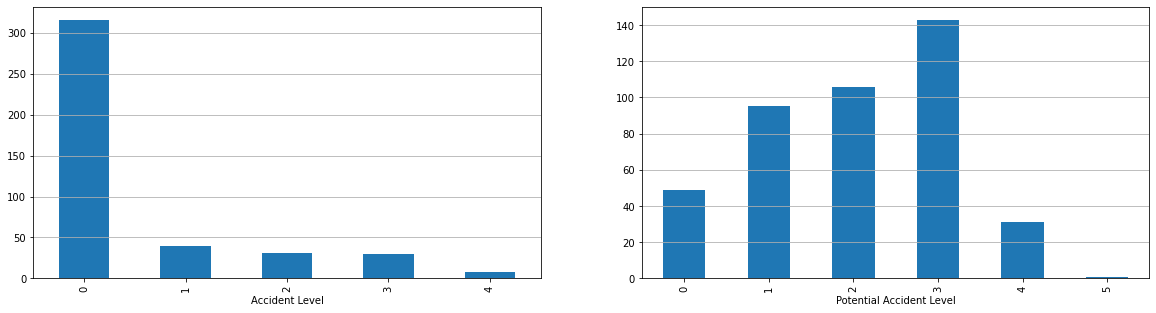

In [20]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
data[acc_level].reset_index().groupby(acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[0]).grid(axis='y')

pot_acc_level = "Potential Accident Level"
data[pot_acc_level].reset_index().groupby(pot_acc_level).count().plot(kind="bar", legend=False, 
        ax=ax[1]).grid(axis='y')


plt.show()

Accident level I is the most occured accident level of all the accidents in the dataset.

Potential Accident level IV is the most occured potential accident level of all the accidents in the dataset.

**Country**

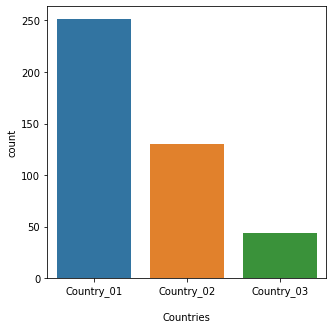

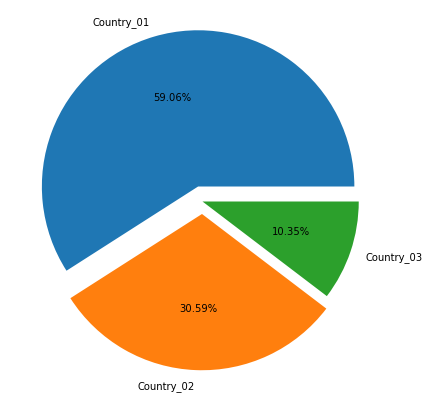

In [21]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Country'],order=data['Country'].value_counts().index)
plt.xlabel("\nCountries")

plt.figure(figsize=(7,10))
plt.pie(data['Country'].value_counts(), labels=['Country_01','Country_02','Country_03'], explode=(0.1,0.08,0),autopct = '%1.2f%%');

The most affected country from the above dataset is country_01 with around 59% of the accidents.

Most accidents happened in Country_01 .Its count is 251 ,which is equivalent to 59.06% .

**Local**

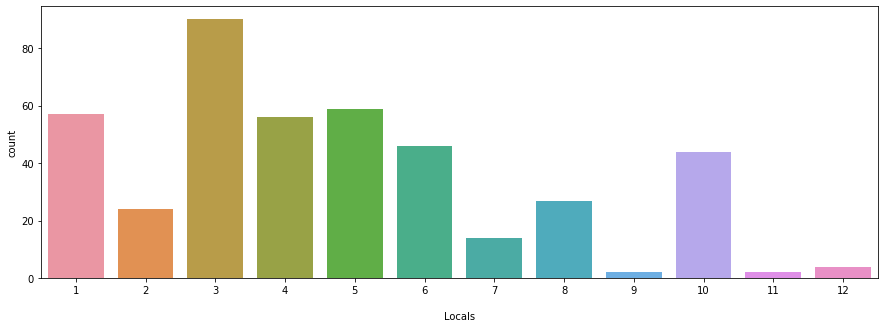

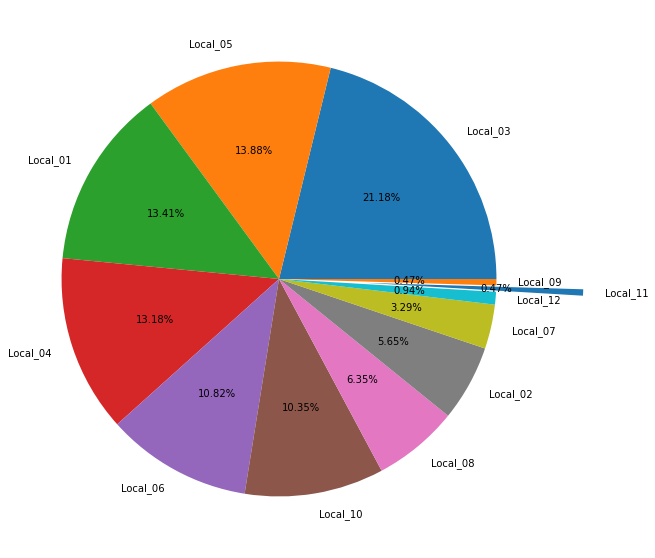

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['Local'])
plt.xlabel("\nLocals")

plt.figure(figsize=(10,10))
plt.pie(data['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

Most accidents happened in Local_03 .Its count is 90 ,which is equivalent to 21.18% .

**Industry Sector**

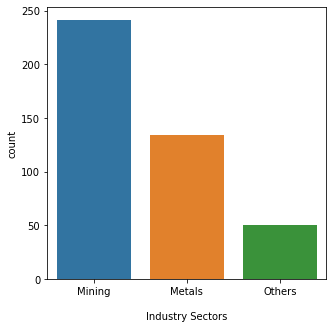

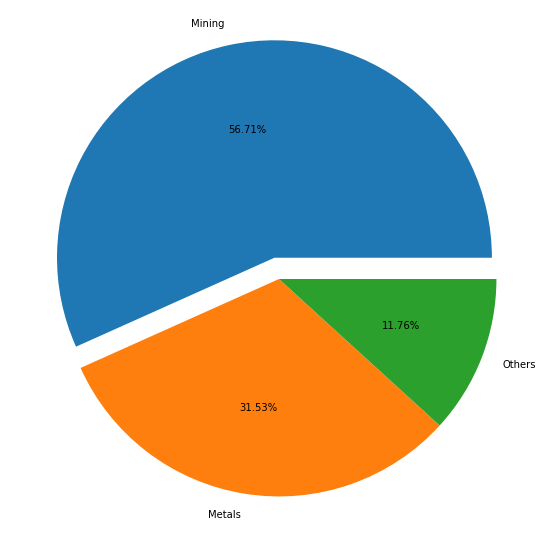

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Industry Sector'])
plt.xlabel("\nIndustry Sectors")

plt.figure(figsize=(10,10))
plt.pie(data['Industry Sector'].value_counts(), labels=['Mining', 'Metals', 'Others'], explode=(0.1,0,0),autopct = '%1.2f%%');


Mostly affected sector is Mining sector. 56.71% of accidents occur in Mining sector.

Most accidents happened in mining Industry sector .Its count is 241 ,which is equivalent to 56.71%.

Accident level

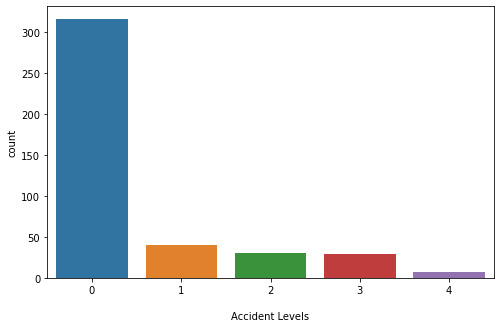

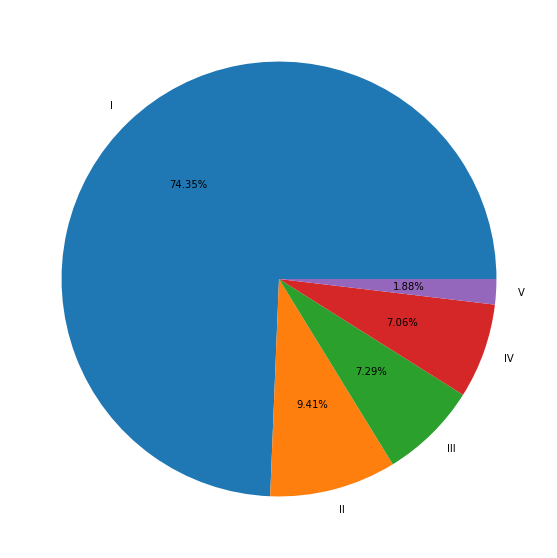

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Accident Level'])
plt.xlabel("\nAccident Levels")

plt.figure(figsize=(10,10))
plt.pie(data['Accident Level'].value_counts(), labels=['I', 'II', 'III' ,'IV' ,'V'], explode=(0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

Most accidents belongs to "Accident Level" I .Its count is 316 which is equivalent to 74.35%% of total accidents.

Potential Accident level

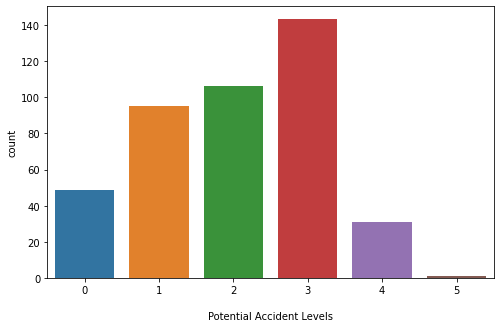

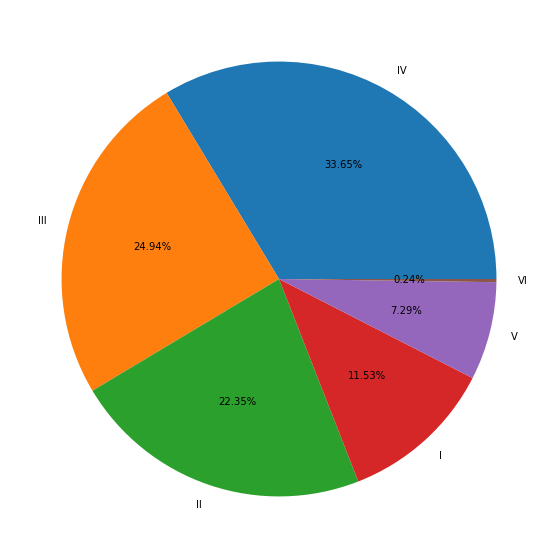

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Potential Accident Level'])
plt.xlabel("\nPotential Accident Levels")

plt.figure(figsize=(10,10))
plt.pie(data['Potential Accident Level'].value_counts(), labels=['IV','III','II','I','V','VI'], explode=(0,0,0,0,0,0),autopct = '%1.2f%%')
plt.show()

Most "Potential Accident Level" belongs to level IV .Its count is 143 which is equivalent to 33.65% of total potential accidents.

Gender

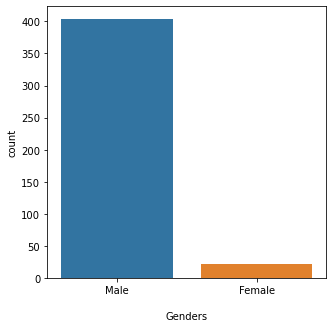

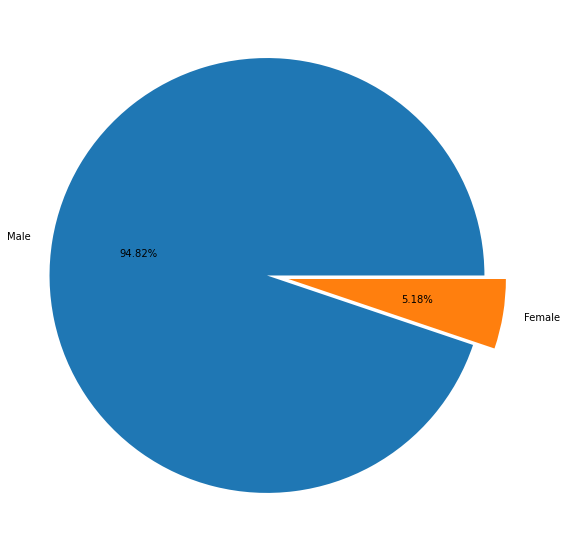

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Gender'])
plt.xlabel("\nGenders")

plt.figure(figsize=(10,10))
plt.pie(data['Gender'].value_counts(), labels=['Male', 'Female'], explode=(0.1,0),autopct = '%1.2f%%');

Most affected wokers in accidents are male .Their count is 403 ,which is equivalent to 94.82%

Employee type

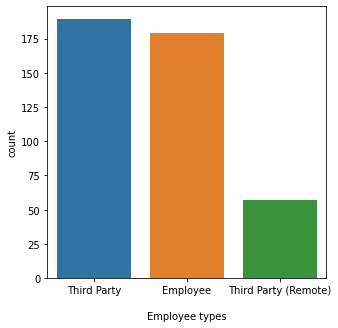

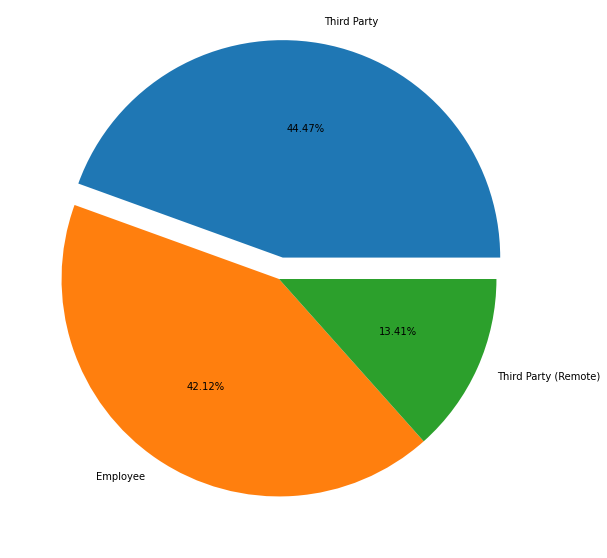

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Employee type'])
plt.xlabel("\nEmployee types")

plt.figure(figsize=(10,10))
plt.pie(data['Employee type'].value_counts(), labels=['Third Party', 'Employee', 'Third Party (Remote)'], explode=(0.1,0,0),autopct = '%1.2f%%');

Employee type of Third party is most prone to Accident risk.

Most affected Employee type are Third party workers .Their count is 189 ,which is equivalent to 44.47%.

Critical Risk

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Venomous Animals'),
  Text(5, 0, 'Cut'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Pressurized Systems'),
  Text(11, 0, 'Fall prevention (same level)'),
  Text(12, 0, 'remains of choco'),
  Text(13, 0, 'Suspended Loads'),
  Text(14, 0, 'Fall prevention'),
  Text(15, 0, 'Liquid Metal'),
  Text(16, 0, 'Pressurized Systems / Chemical Substances'),
  Text(17, 0, 'Blocking and isolation of energies'),
  Text(18, 0, 'Power lock'),
  Text(19, 0, 'Projection of fragments'),
  Text(20, 0, 'Machine Protection'),
  Text(21, 0, 'Electrical Shock'),
  Text(22, 0, '\nNot applicable'),
  Text(23, 0, 'Burn'),
  Text(24, 0, 'Projection/M

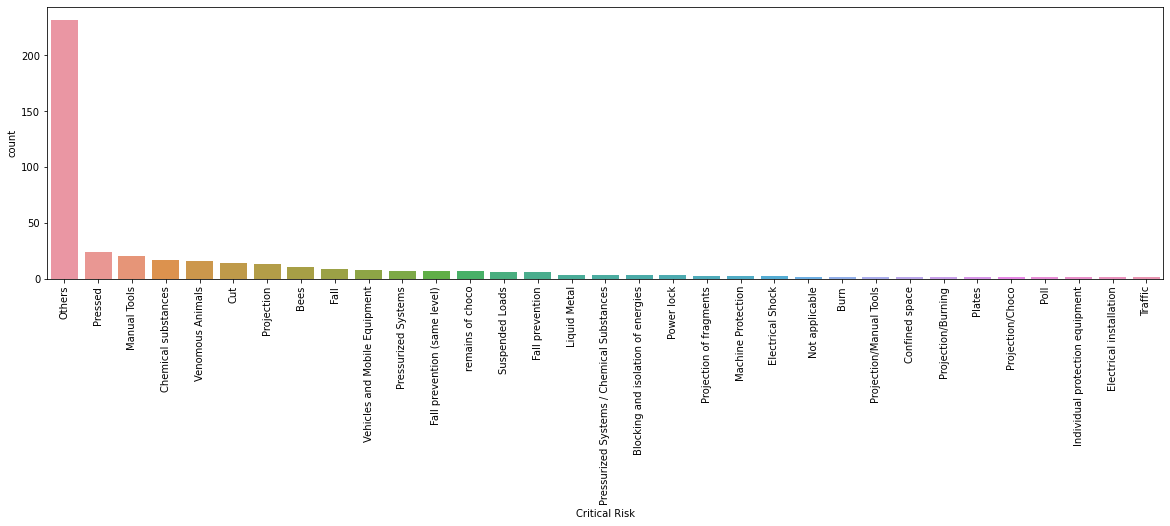

In [29]:
plt.figure(figsize=(20,5))
descending_order = data['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=data['Critical Risk'],order=descending_order);
plt.xticks(rotation = 'vertical')

Risk Factor Analysis:

When we count the number of incidents by each type of critical risk, Others tops the list.

Year

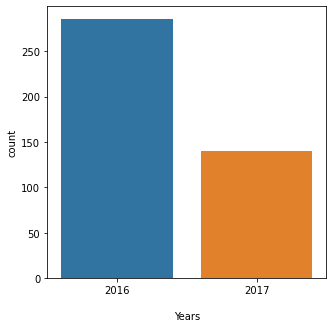

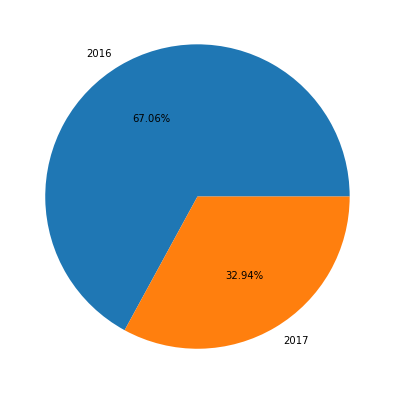

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Year'])
plt.xlabel("\nYears")

plt.figure(figsize=(7,7))
plt.pie(data['Year'].value_counts(), labels=['2016', '2017'], explode=(0,0),autopct = '%1.2f%%')

plt.show()

 **Most accidents happend in year 2016.Count is 285 ,which is equivalent to 67.06% .**

Month

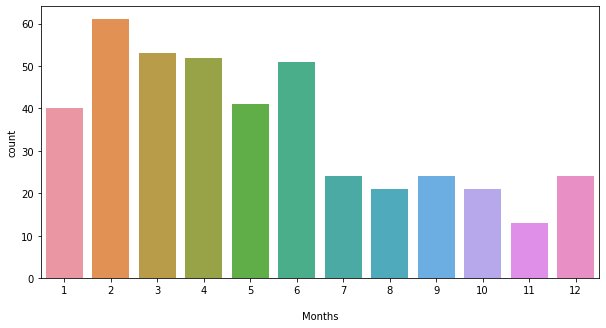

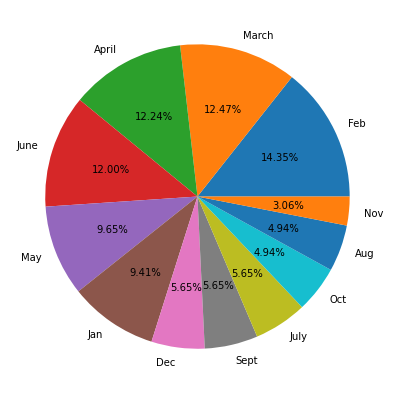

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Month'])
plt.xlabel("\nMonths")

plt.figure(figsize=(7,7))
plt.pie(data['Month'].value_counts(), labels=['Feb', 'March','April', 'June','May', 'Jan','Dec', 'Sept','July', 'Oct','Aug', 'Nov'], explode=(0,0,0,0,0,0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

Most accidents happend in Feb month.Count is 61 ,which is equivalent to 14.35%

**Weekday**

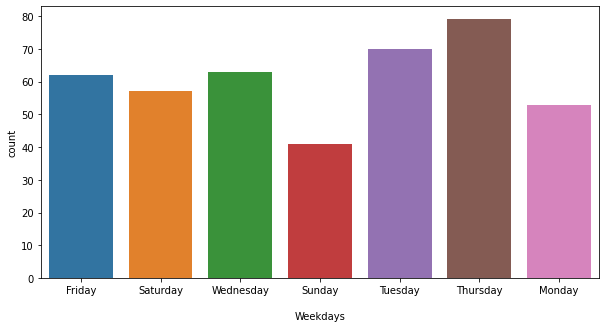

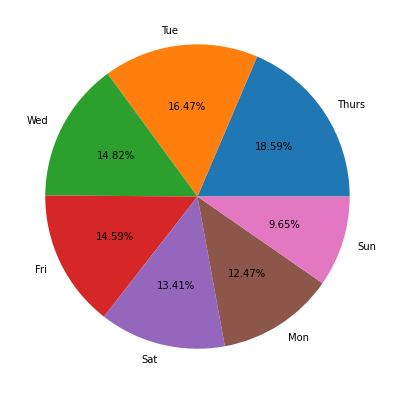

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x=data['Weekday'])
plt.xlabel("\nWeekdays")

plt.figure(figsize=(7,7))
plt.pie(data['Weekday'].value_counts(), labels=['Thurs', 'Tue','Wed', 'Fri','Sat', 'Mon','Sun'], explode=(0,0,0,0,0,0,0),autopct = '%1.2f%%')

plt.show()

Most accidents happend in Thursday .Count is 79 ,which is equivalent to 18.59%

Multivariate Analysis:

Analysis of Industry Sector wrt Accident/ Potential Accident Level

(array([0, 1, 2]),
 [Text(0, 0, 'Mining'), Text(1, 0, 'Metals'), Text(2, 0, 'Others')])

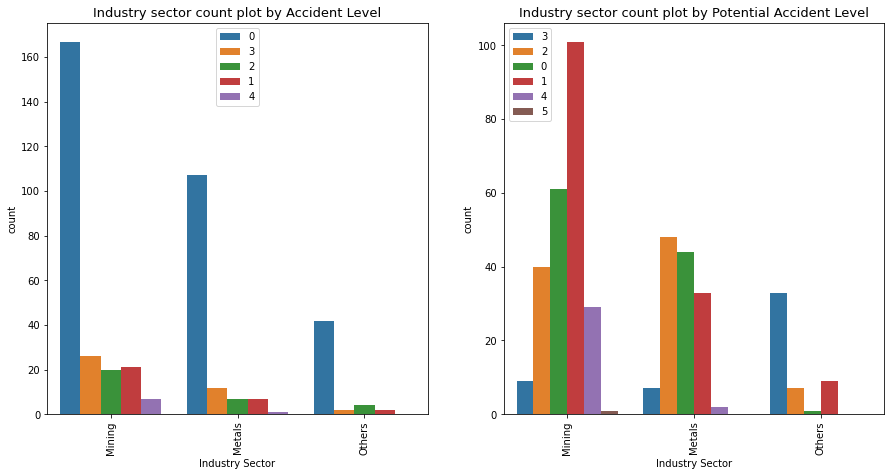

In [33]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)



#### **Industry Sector Vs Accident Level**
*   **Accident level I is highest in all industry sector (Mining, Metals and Other).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **There are very few cases for Accident level 5.Others sector didn't reported any case for this level**

#### **Industry Sector Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in all industry sector (Mining, Metals and Others).**
*   **Most accidents happened in Mining industry sector.**
*   **Others industry sector has less accidents in comparision to other industries.**
*   **These are very few cases for Accident level 6.Metals and Others sector didn;t reported case for this accident level**




**Analysis of Country wrt Accident/ Potential Accident Level**

(array([0, 1, 2]),
 [Text(0, 0, 'Country_01'),
  Text(1, 0, 'Country_02'),
  Text(2, 0, 'Country_03')])

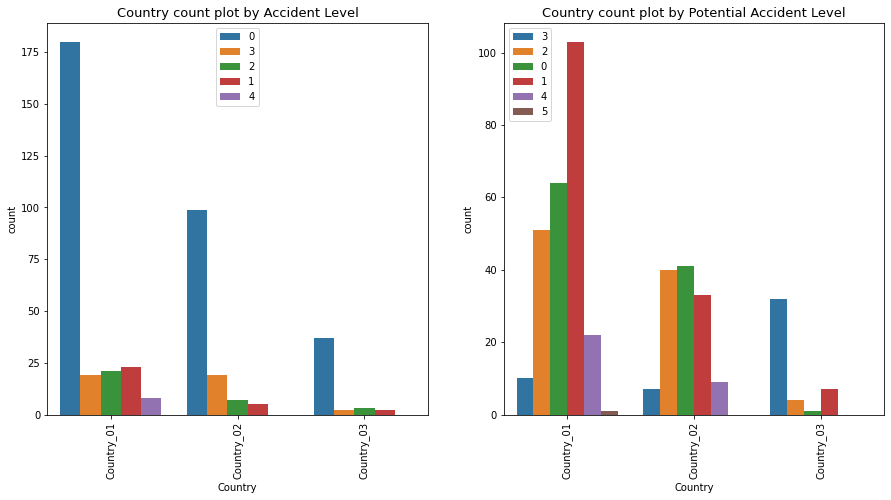

In [34]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Country', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Country'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Country' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Country'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)



#### **Country Vs Accident Level**
*   **Accident level I is highest in all countries.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

#### **Country Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Country 1.**
*   **Most accidents happened in country 1.**
*   **Accident level in country 3 is lesser than other countries.**

**Analysis of Year with respect to Accident/ Potential Accident Level**

(array([0, 1]), [Text(0, 0, '2016'), Text(1, 0, '2017')])

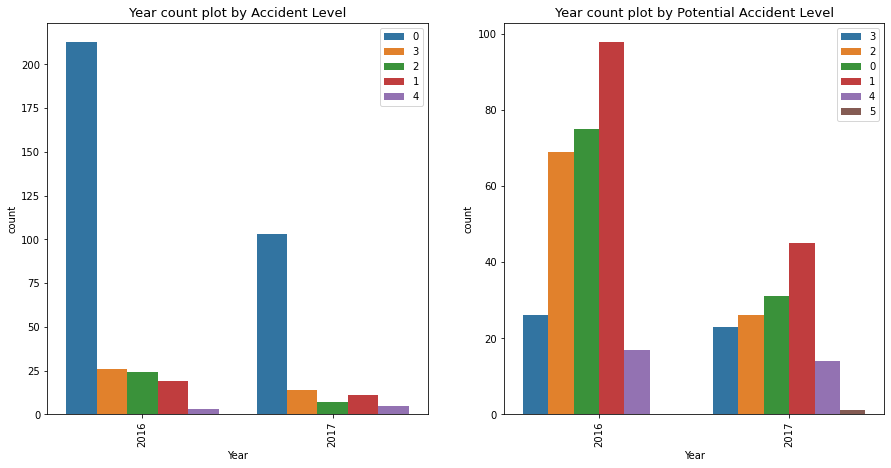

In [35]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Year', data = data, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Year'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Year' , data = data, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Year'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = data['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

**Local Vs Accident level and Local Vs Potential accident level**

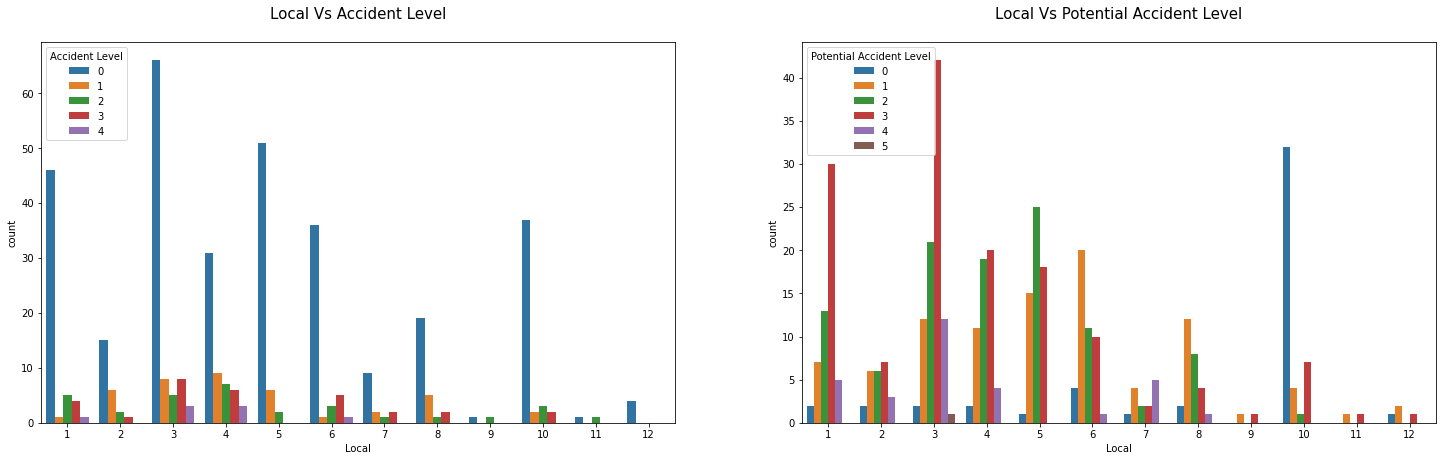

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(25,7)

sns.countplot(x=data['Local'], hue = data['Accident Level'],ax = ax1)
ax1.set_title('Local Vs Accident Level\n',fontsize = 15)

sns.countplot(x=data['Local'],hue = data['Potential Accident Level'],ax=ax2)
ax2.set_title('Local Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Local Vs Accident Level**
*   **Accident level I is highest in almost all localities.**
*   **Accident level I is highest in Local 3.**
*   **Local 9,11 and 12 have less accidents level.**

#### **Local Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in Local 3.**
*   **Potential Accident level 4 is higher in most localities.**
*   **Local 9,11 and 12 have less potential accidents level.**
*   **Potential Accident level 1 is highest in local 10.**
*   **Potential Accident level 3 is highest in local 5.**

Year Vs Accident level and Year Vs Potential accident level

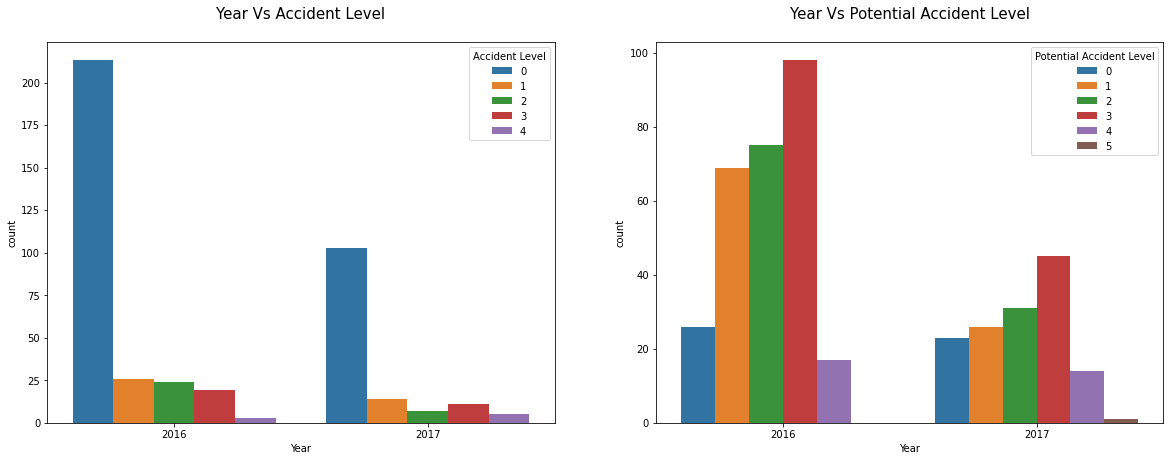

In [37]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,7)

sns.countplot(x=data['Year'], hue = data['Accident Level'],ax = ax1)
ax1.set_title('Year Vs Accident Level\n',fontsize = 15)

sns.countplot(x=data['Year'],hue = data['Potential Accident Level'],ax=ax2)
ax2.set_title('Year Vs Potential Accident Level\n',fontsize = 15)

plt.show()

#### **Year Vs Accident Level**
*   **Accident level I is highest in year 2016 and 2017.**
*   **In Year 2016 more accidents happened in than 2017.**

#### **Year Vs Potential Accident Level**
*   **Potential Accident level 4 is highest in year 2016 and 2017.**
*   **In Year 2016 more potential accidents happened in than 2017.**
*   **Potential Accident level 6 is didn;t happened in year 2016.**

Local Vs Year

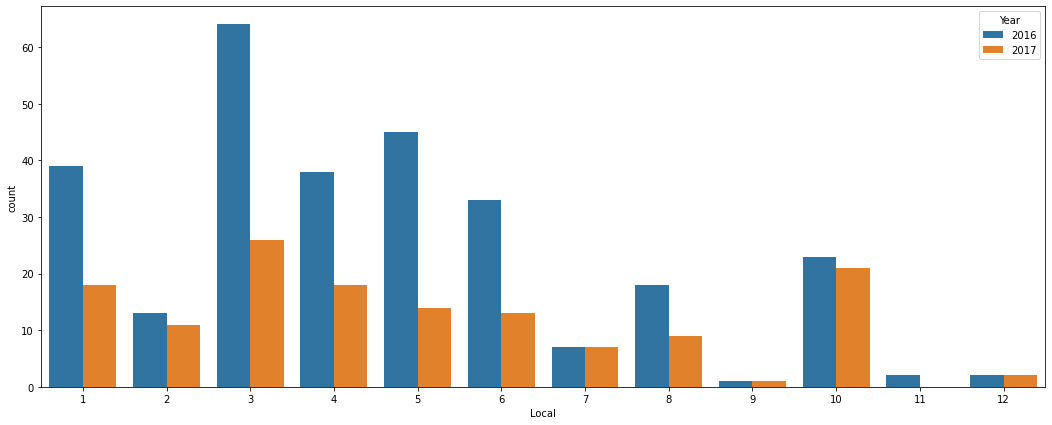

In [38]:
plt.figure(figsize=(18,7))
sns.countplot(x=data["Local"],hue=data["Year"]);

In 2016 and 2017 local 3 has more accidents than other localities.

Local 9,11,12 has less accidents in 2016 and 2017 than all other localities

Country Vs Year

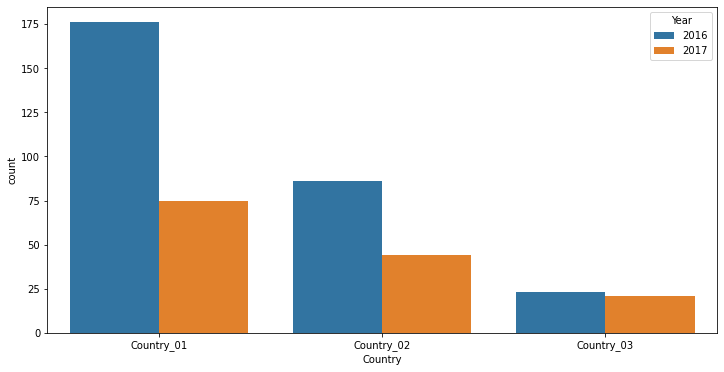

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x=data["Country"],hue=data["Year"]);

In 2016 and 2017 country 1 has more accidents than other countries.

In 2016 and 2017 country 3 has least accidents than other countries.

Analyzing Country and Employee Type

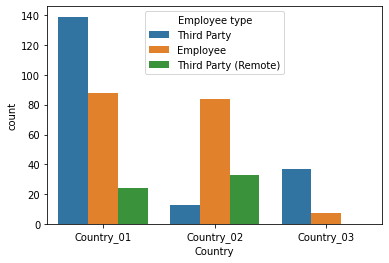

In [40]:
sns.countplot(x="Country", data=data, hue="Employee type");

Incidents in Country_01 has Employee type of Third Party high in number.

Incidents in Country_02 has Employee type of Employee high in number.

Incidents in Country_03 has Employee type of Third Party high in number.

Analyzing Country and Industry Sector

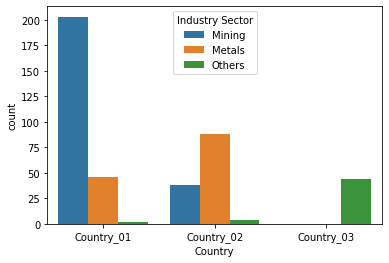

In [41]:
sns.countplot(x="Country", data=data, hue="Industry Sector");


In Country_01, Incidents in Mining sector are very high.

In Country_02, Incidents in Metals sector are very high.

In Country_03, Incidents in Other sectors are very high.

Local Vs Employee Type

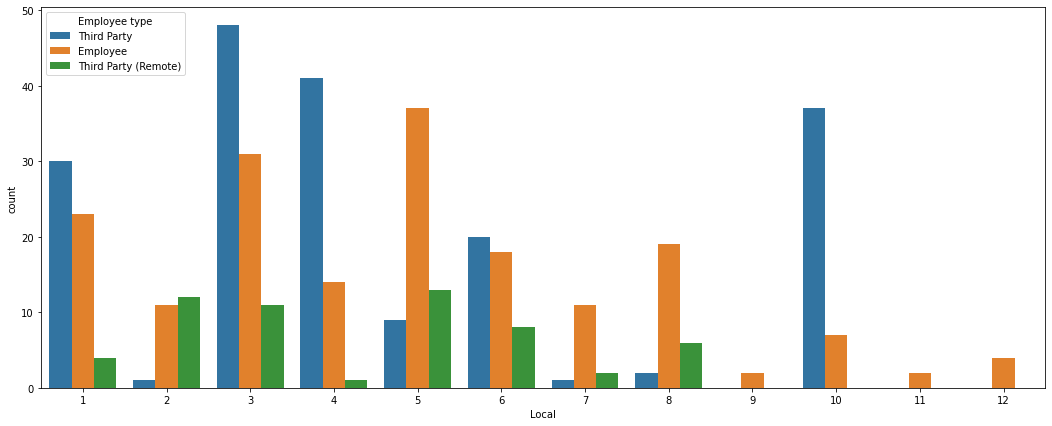

In [42]:
plt.figure(figsize=(18,7))
sns.countplot(x=data["Local"], hue=data["Employee type"]);

*   **Local 3 has highest no of Third Party employees**
*   **Local 3 has more employees than other localities.**
*   **Local 10 don;t have Third Party (Remote) employees.**
*   **Local 9,11,12 don;t have Employee and Third Party employees.**

Local vs Industry Sector

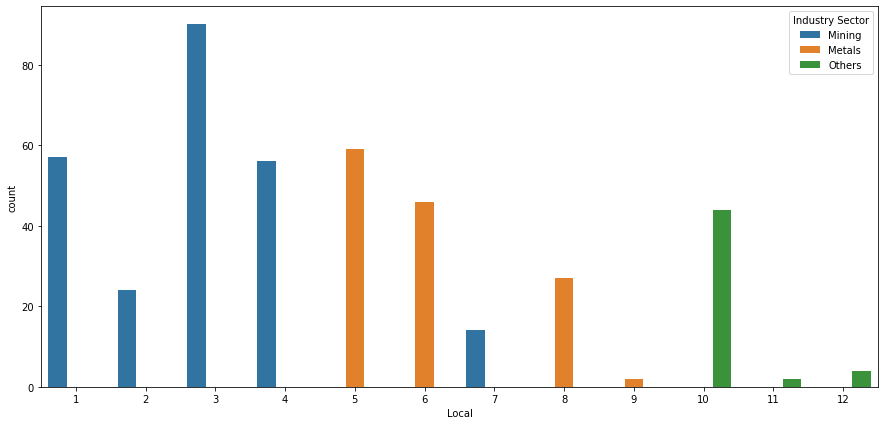

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Local"],hue=data["Industry Sector"]);

*   **Local 3 has highest number of Mining industry sector.**
*   **Local 5 has highest number of Metals industry sector.**
*   **Local 1,2,3,4,7 has Mining industry sector.**
*   **Local 5,6,8,9 has Metals industry sector.**
*   **Local 10,11,12 has Others industry sector.**

Local vs Country

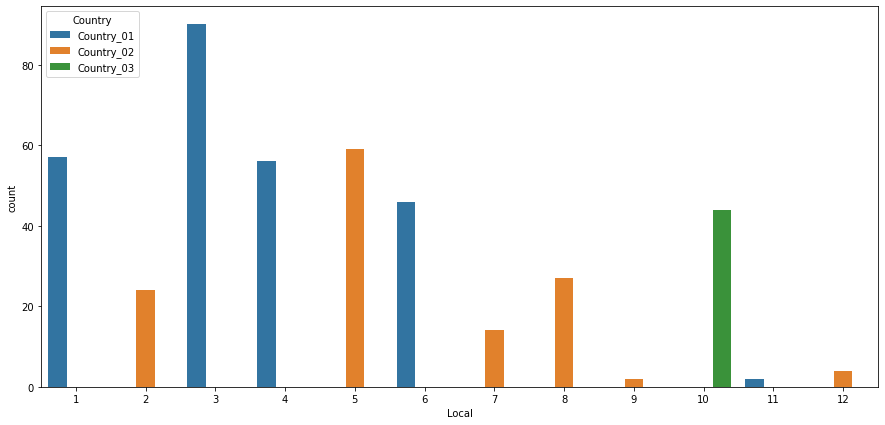

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x=data["Local"],hue=data["Country"]);

*   **Local 3 has biggest in Country 1.**
*   **Local 2 has biggest in Country 1..**
*   **Local 1,3,4,6,11 belongs to country 1.**
*   **Local 2,5,7,8,9,12 belongs to country 2.**
*   **Local 10 belongs to country 3.**

In [ ]:
wordcloud - calss 1 - 6

intersection - common word

unique words - related to potential level

percentage of words

modelling - TD-IDEF , word2vec, countervectorizer

pre processing technique - SMOTE 

#### Preprocessing text
1. Converting  to lowercase
2. Removing special characters
3. Using Wordnet lemmatizer and lemmatizing the words
4. Removing stopwords

In [6]:
word_lemma = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

In [7]:
def processtext(text):
    sentence = text.lower()  
    sentence = re.sub(r'[^a-zA-Z0-9 ]', '', sentence)
    words = [word_lemma.lemmatize(word) for word in sentence.split() if word not in stopwords]
    ret_text = ''
    for word in words:
        ret_text = ret_text + ' ' + word
    return ret_text

In [8]:
#adding new column to data set
data['Description_processed'] = data['Description'].apply(processtext)

#### Bag of words Using Count Vectorizer
1. Using the processed description we can find the bag of words for each accident level

In [9]:
grp1 = data.groupby('Accident Level')

In [10]:
grp1.size()

Accident Level
I      316
II      40
III     31
IV      30
V        8
dtype: int64

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

In [13]:
def getbagofwords_vector(text):
    vectorizer = CountVectorizer()
    vectorizer.fit(text)
    print(len(vectorizer.vocabulary_))
    words = sorted(vectorizer.vocabulary_)
    word_count = vectorizer.vocabulary_
    return words, word_count

In [14]:
bagofwords_lvl1,lvl1_wc = getbagofwords_vector(grp1.get_group('I')['Description_processed'])

2604


In [15]:
bagofwords_lvl2,lvl2_wc = getbagofwords_vector(grp1.get_group('II')['Description_processed'])

647


In [16]:
bagofwords_lvl3,lvl3_wc = getbagofwords_vector(grp1.get_group('III')['Description_processed'])

673


In [17]:
bagofwords_lvl4,lvl4_wc = getbagofwords_vector(grp1.get_group('IV')['Description_processed'])

716


In [18]:
bagofwords_lvl5,lvl5_wc = getbagofwords_vector(grp1.get_group('V')['Description_processed'])

276


In [19]:
bagofwords_lvl6,lvl6_wc = getbagofwords_vector(grp1.get_group('VI')['Description_processed'])

KeyError: 'VI'

#### Word cloud using the bag of words

In [20]:
from wordcloud import WordCloud
import wordcloud

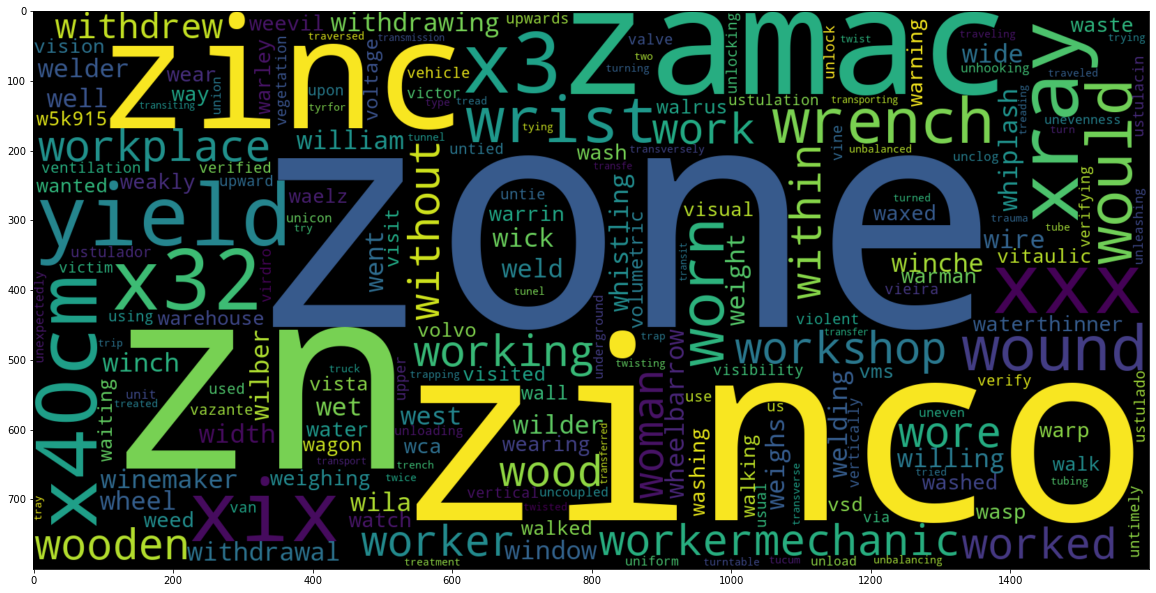

In [30]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl1_wc)
plt.imshow(wc , interpolation = 'bilinear')

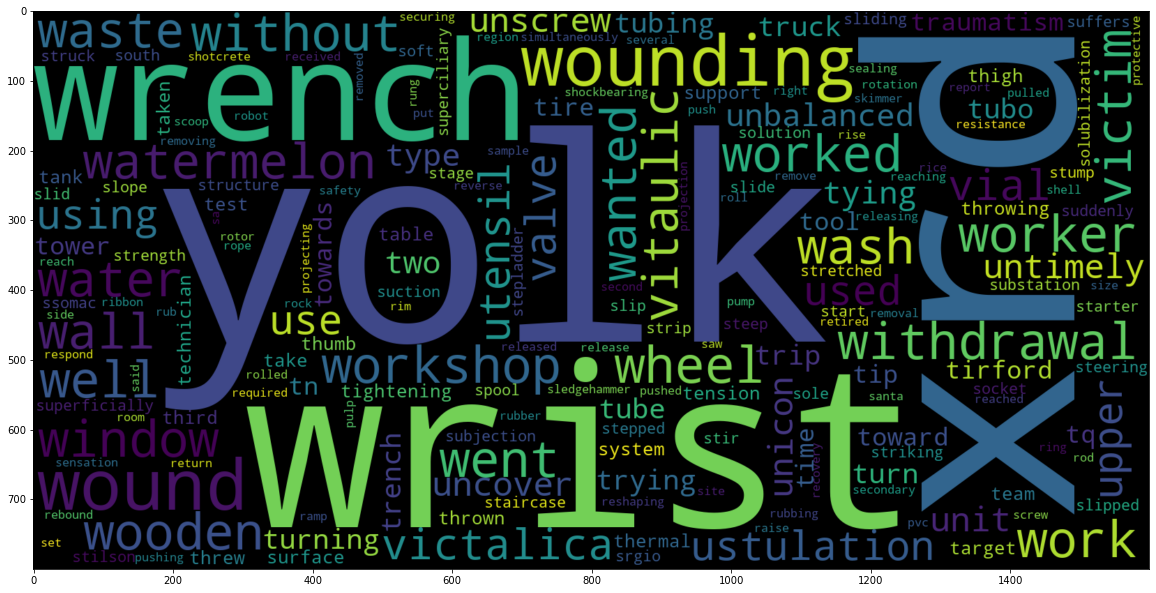

In [31]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl2_wc)
plt.imshow(wc , interpolation = 'bilinear')

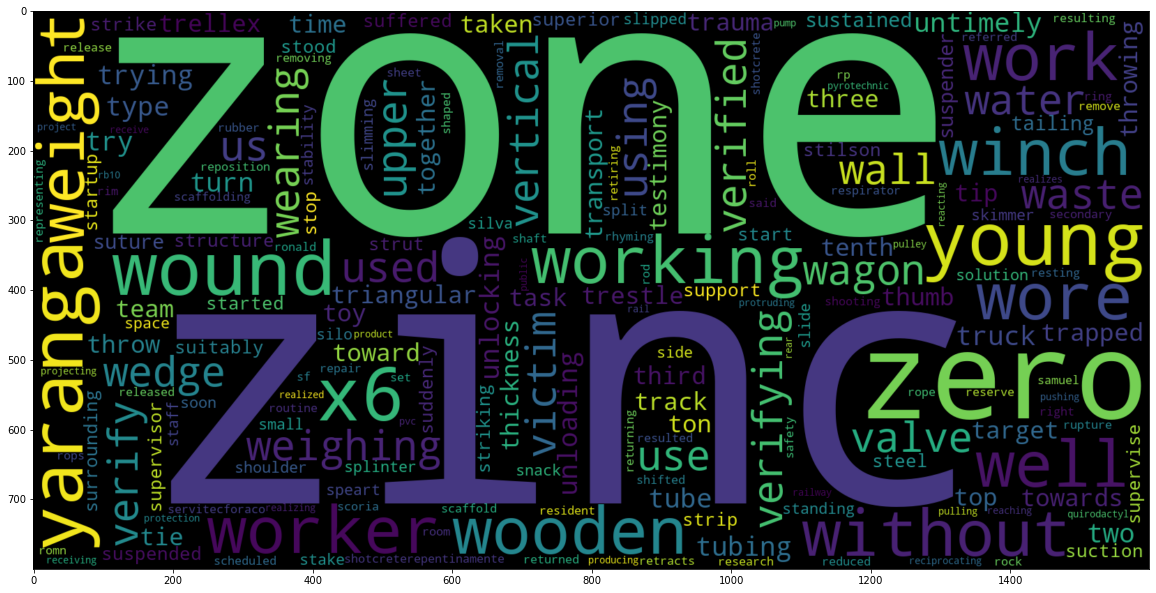

In [32]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl3_wc)
plt.imshow(wc , interpolation = 'bilinear')

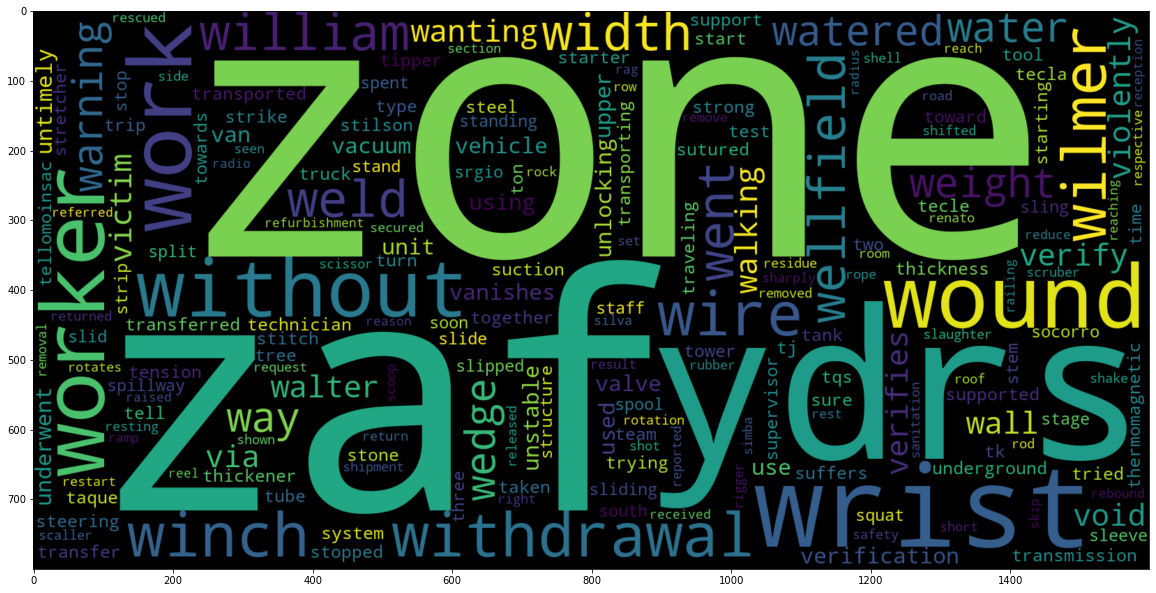

In [33]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl4_wc)
plt.imshow(wc , interpolation = 'bilinear')

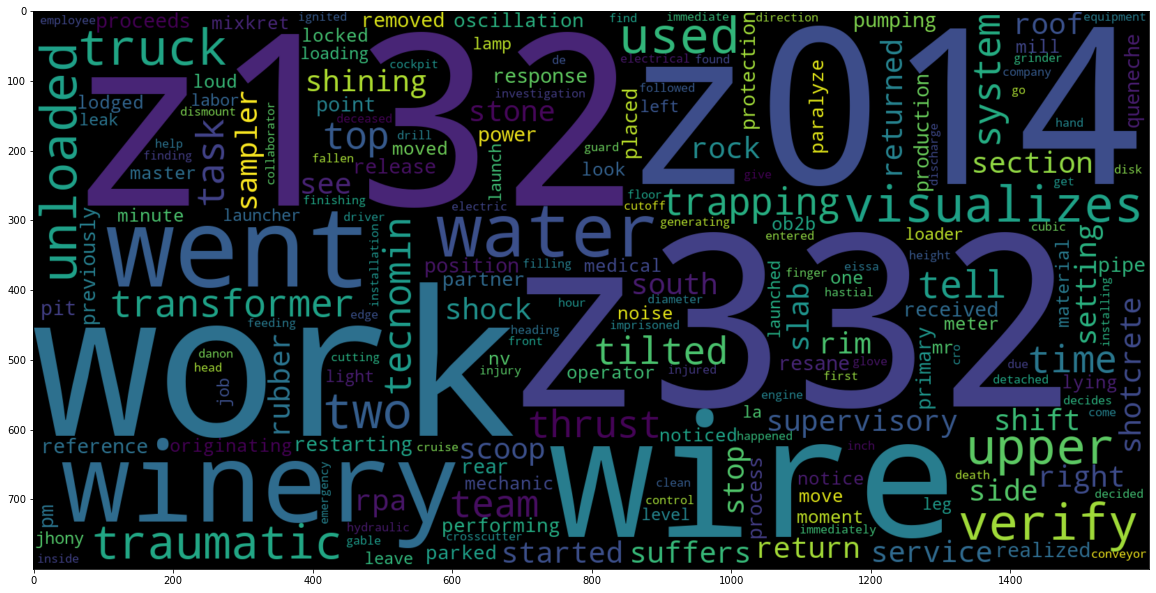

In [34]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl5_wc)
plt.imshow(wc , interpolation = 'bilinear')

In [26]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl6_wc)
plt.imshow(wc , interpolation = 'bilinear')

NameError: name 'lvl6_wc' is not defined

<Figure size 1440x1440 with 0 Axes>

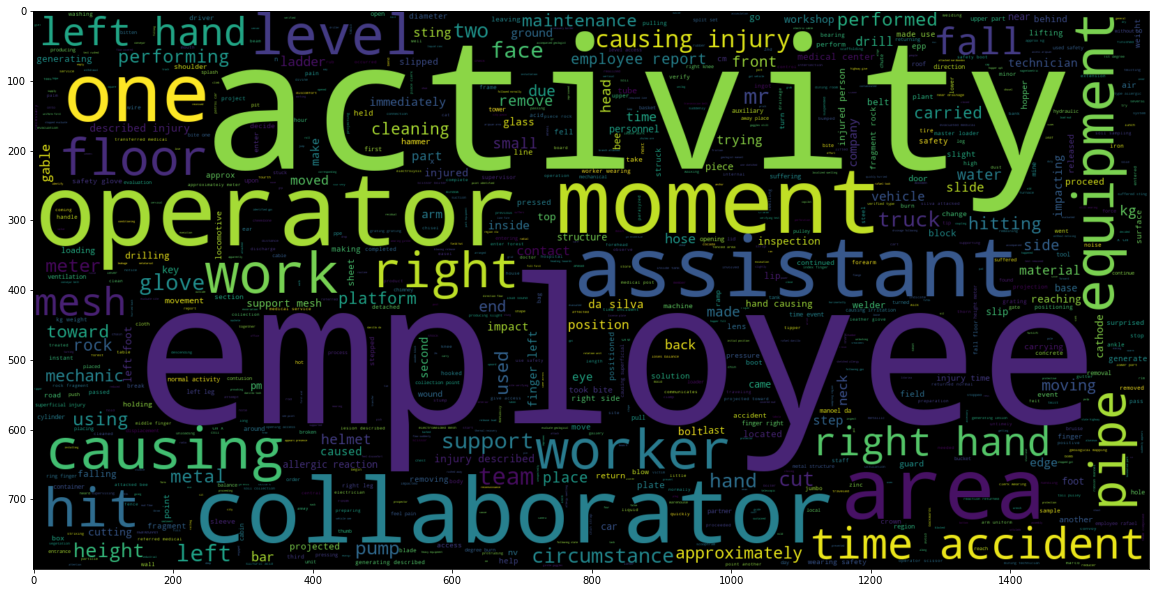

In [35]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800).generate(" ".join(data[data['Accident Level'] == 'I'].Description_processed))
plt.imshow(wc , interpolation = 'bilinear')

#### Removing common words from all the bag of words

In [41]:
def removecommonwords():
    for i in bagofwords_lvl1:
        if i in bagofwords_lvl2 and i in bagofwords_lvl3 and i in bagofwords_lvl4 and i in bagofwords_lvl5:
            bagofwords_lvl1.remove(i)
            bagofwords_lvl2.remove(i)
            bagofwords_lvl3.remove(i)
            bagofwords_lvl4.remove(i)
            bagofwords_lvl5.remove(i)

In [42]:
removecommonwords()

In [43]:
print(len(bagofwords_lvl1))
print(len(bagofwords_lvl2))
print(len(bagofwords_lvl3))
print(len(bagofwords_lvl4))
print(len(bagofwords_lvl5))

2544
587
613
656
216


In [44]:
def createnewwc(wordlist, worddict):
    wc={}
    for word in wordlist:
        wc[word] = worddict[word]
    return wc

In [45]:
lvl1_changedwc = createnewwc(bagofwords_lvl1,lvl1_wc)
lvl2_changedwc = createnewwc(bagofwords_lvl2,lvl2_wc)
lvl3_changedwc = createnewwc(bagofwords_lvl3,lvl3_wc)
lvl4_changedwc = createnewwc(bagofwords_lvl4,lvl4_wc)
lvl5_changedwc = createnewwc(bagofwords_lvl5,lvl5_wc)

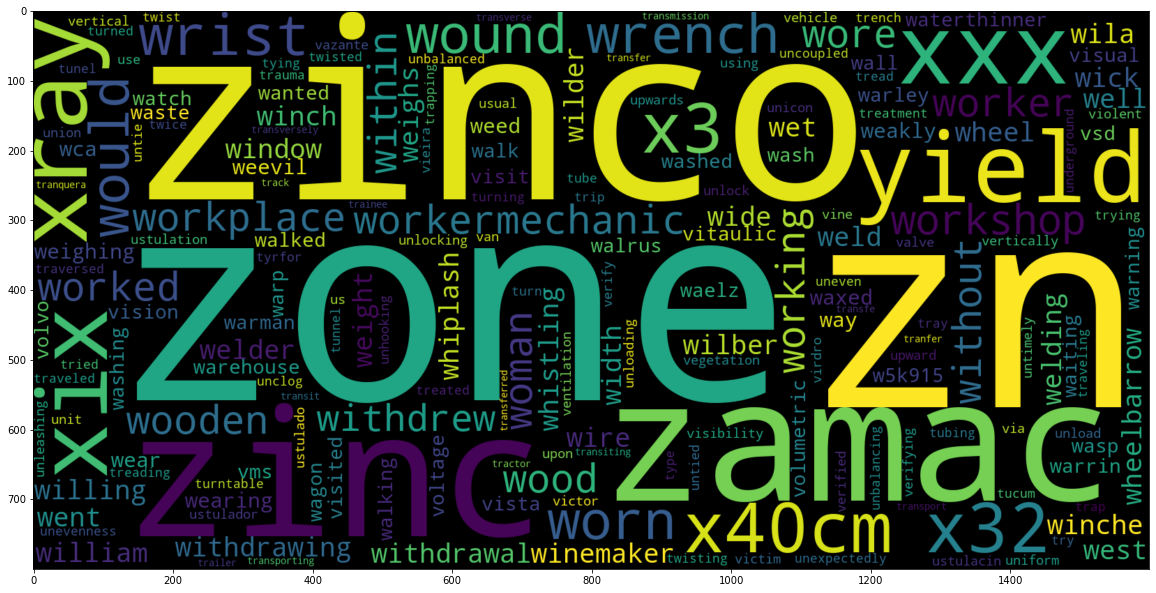

In [46]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl1_changedwc)
plt.imshow(wc , interpolation = 'bilinear')

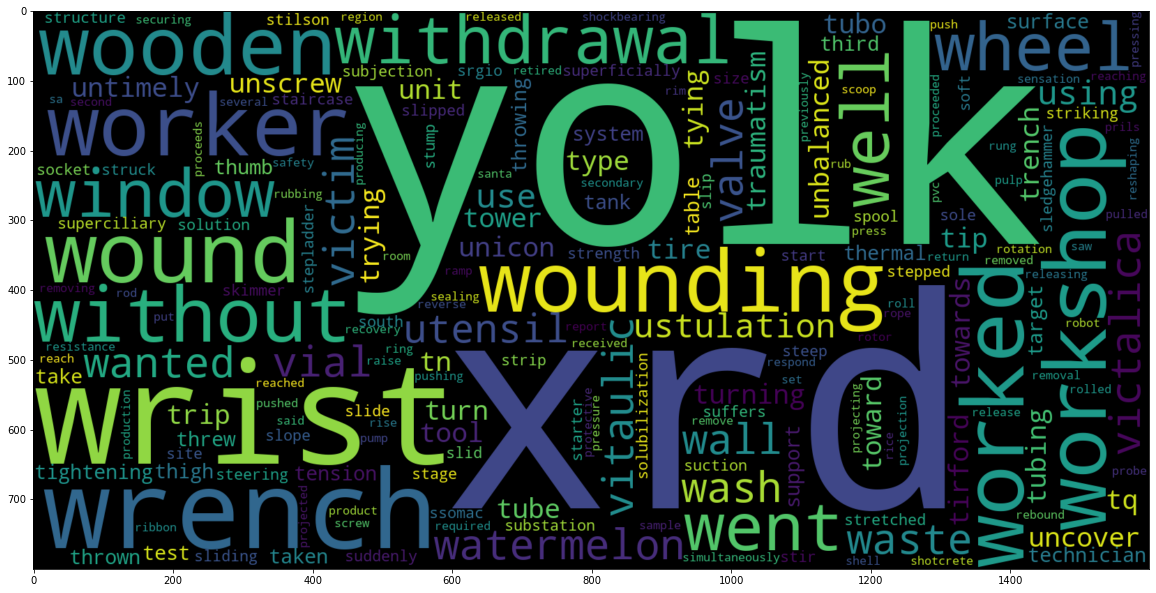

In [47]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl2_changedwc)
plt.imshow(wc , interpolation = 'bilinear')

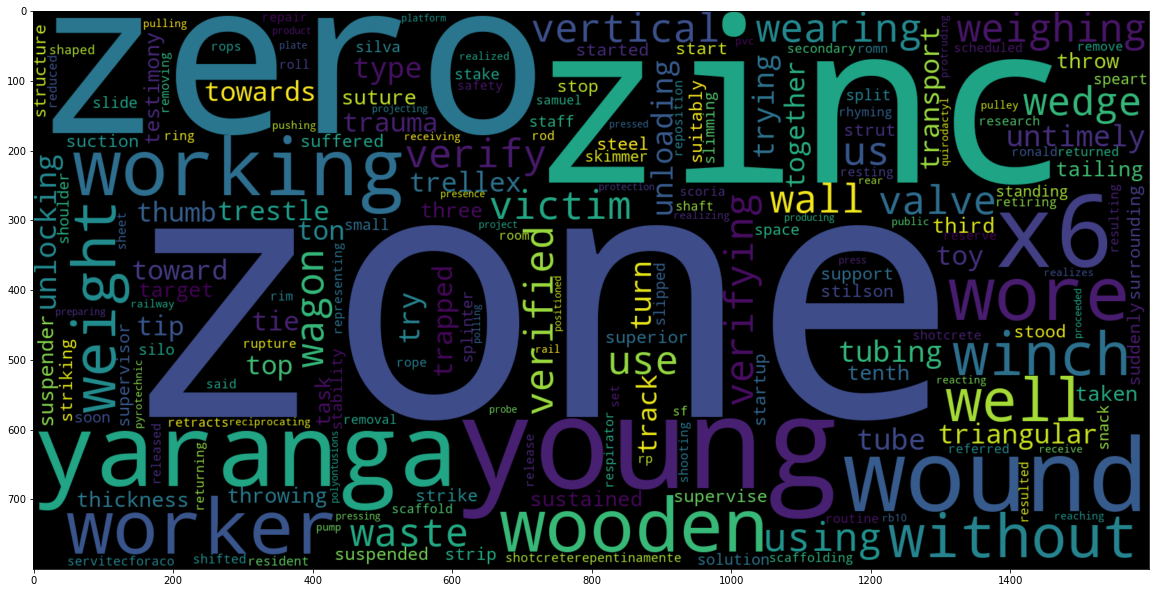

In [48]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl3_changedwc)
plt.imshow(wc , interpolation = 'bilinear')

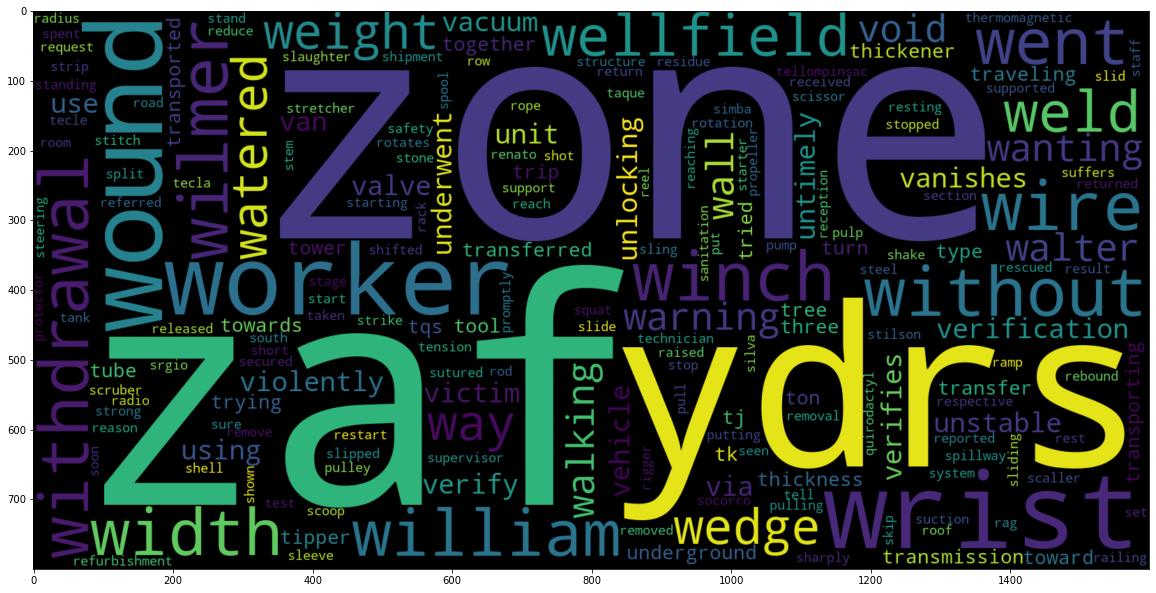

In [49]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl4_changedwc)
plt.imshow(wc , interpolation = 'bilinear')

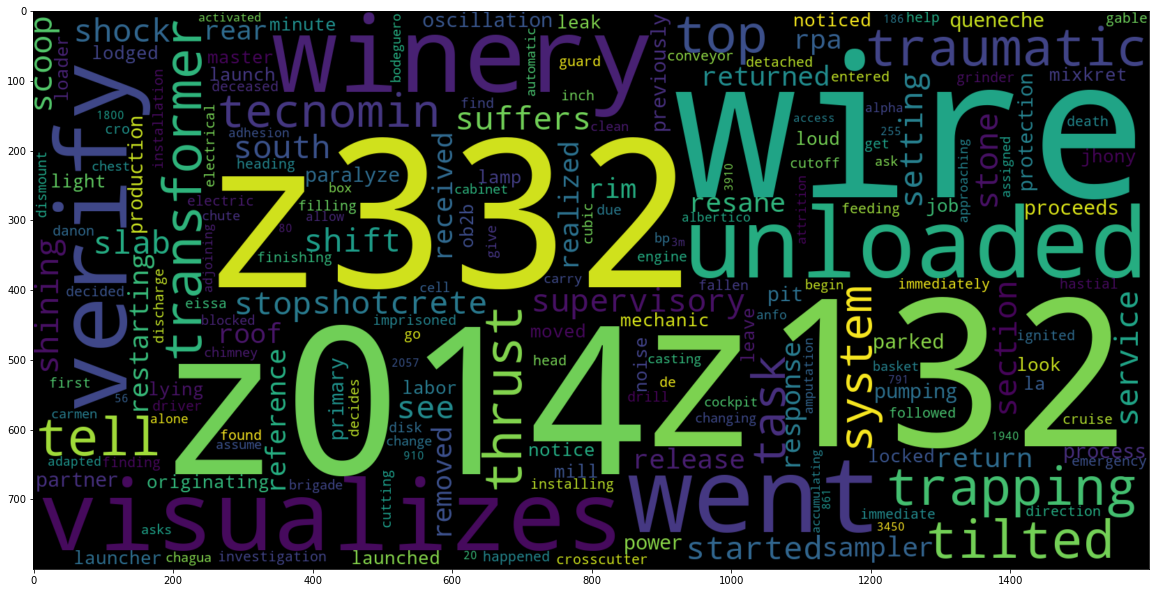

In [50]:
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800).generate_from_frequencies(lvl5_changedwc)
plt.imshow(wc , interpolation = 'bilinear')